# DBScan in 1D

Based off of [cluster-plot-dbscan-py](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

## ToDos

* check that the newly split clusters are 
    * contain enough samples
    * have a total duration longer than the threshold
    * are not embedded within another cluster
* check that there are no embedded clusters
    * times don't overlap $\checkmark\to$ have function
    * if refined clusters are embedded, check if one cluster is noise
* check the stddev of the refined clusters are smaller

In [3]:
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [5]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

## Make the artificial data: 1D1T

**note** "T" here means just the index; later, it could be considered "time"

## Regularize the data

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

## DBScan

### Parameters

The basic algorithmic usage
```
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
```

* `eps` : `float`, default=0.5
    * The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 
    * This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

* `min_samples` : `int`, default=5
    * The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.


The main returns
```
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
```

# Sythetic data

In [6]:
import importlib
import synthetic_data

In [7]:
xxx = np.arange(0,100,0.1)

In [8]:
importlib.reload(synthetic_data);
from synthetic_data import get_1bump, get_bumps, get_noisy_bumps, get_mask

In [69]:
dc = {
        "bump1_amp":  -1.5, "bump1_slope": 0.5, "bump1_start": -20 , "bump1_end": 80,
        "bump2_amp": -4.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50
     }

dc_noise = {"bump1_eta": 0.15, "bump2_eta": 0.025}

In [70]:
yyy = get_bumps(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noisy_bumps(xxx, **dc)

In [83]:
new_mask = get_mask(xxx.size, 0.25)

In [84]:
xxxx = xxx[new_mask]
yyyy = yyyn[new_mask]

In [85]:
#new_X = np.array([[n] for n in get_noise(fff(xxxx))])
yyyy_ = yyyy.reshape(yyyy.size,1) #np.array([[n] for n in yyyy])
xxxx_ = xxxx.reshape(xxxx.size,1) #np.array([[n] for n in xxxx])

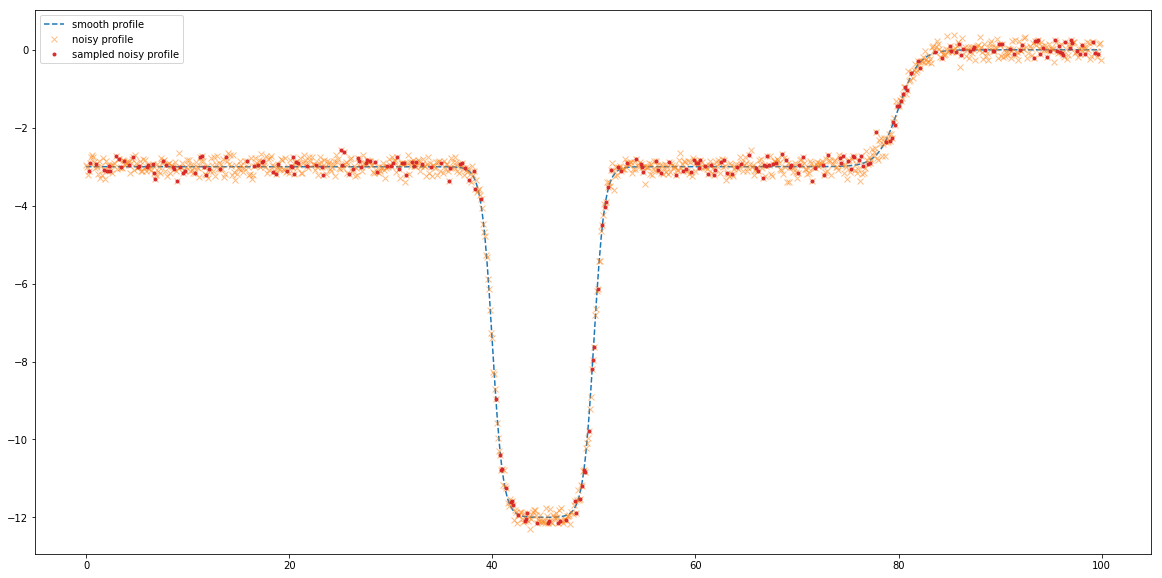

In [86]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--', label='smooth profile')
plt.plot(xxx, yyyn, 'x', alpha=0.5, label='noisy profile')
plt.plot(xxxx, yyyn[new_mask], '.', alpha=0.95, color="C3", label='sampled noisy profile')
plt.legend();

# Clustering

## Get intial clusters

## Split the clusters which have a temporal gap

In [75]:
import numpy.ma as ma
tdiff = lambda x : np.concatenate([np.array([0.0]), x[1:]-x[:-1]])

In [88]:
import split_clusters
importlib.reload(split_clusters);
from split_clusters import get_split_clusters

time_thresh = 5.0
eps=0.05
min_samples = 5

db = DBSCAN(eps=eps, min_samples=min_samples).fit(yyyy_)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

metric_str = 'For %f, nr. clusters: %d, nr noise points: %d' % (eps, n_clusters_, n_noise_)

sil_sco = -1
if np.unique(labels).size>1:
    sil_sco = metrics.silhouette_score(yyyy_, labels)
    add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
else:
    add_str=''

print(metric_str + add_str)

For 0.050000, nr. clusters: 4, nr noise points: 43, Silhouette Coefficient: 0.388
Old labels: {0, 1, 2, 3, -1}
	time break(s) found: for k=0, there is 1 break
	time break(s) found: for k=1, there are 2 breaks
	pass on k=2
	pass on k=3
	do nothing for k = -1
New labels: {0, 1, 2, 3, 4, -1}


In [78]:
import plotting_helper
importlib.reload(plotting_helper);
from plotting_helper import plot_refined, plot_regular

Old labels: {0, 1, 2, 3, 4, -1}
	pass on k=0
	pass on k=1
	pass on k=2
	pass on k=3
	pass on k=4
	do nothing for k = -1
New labels: {0, 1, 2, 3, 4, -1}


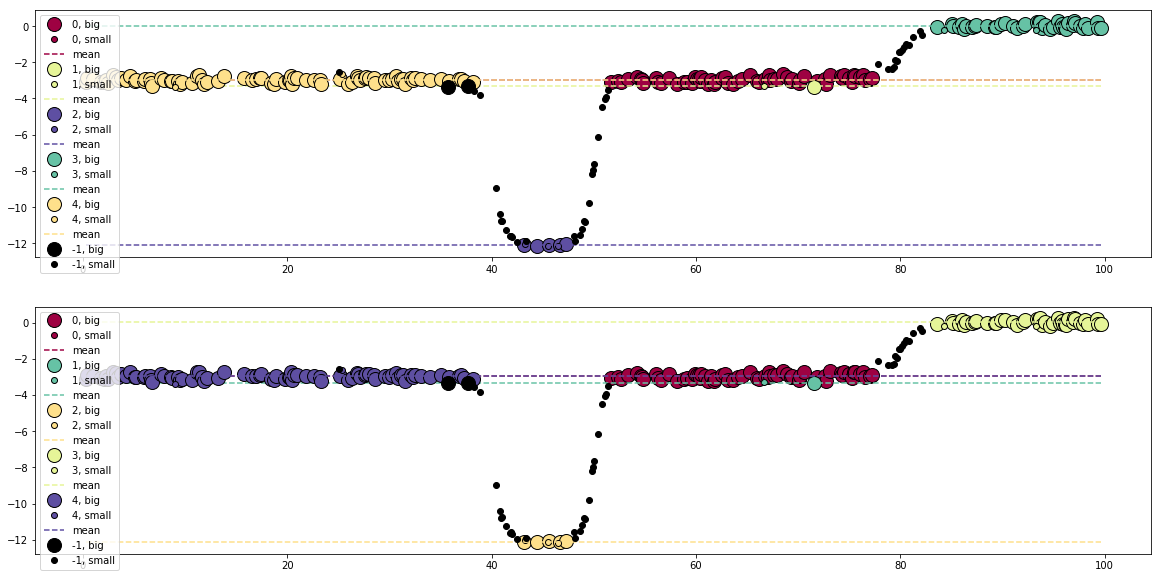

In [94]:
fig, ax = plt.subplots(2,1, figsize=[20,10])


ax[0] = plot_regular(labels, core_samples_mask, xxxx, yyyy, ax[0])
ax[0].legend()

labels_ = get_split_clusters(labels, time_thresh, xxxx_, yyyy_)

ax[1] = plot_regular(labels, core_samples_mask, xxxx, yyyy, ax[1])
ax[1].legend()

## Refinement

In [80]:
import random

In [81]:
yyyy_[class_member_mask & ~core_samples_mask].shape

(1, 1)


For coarse cluster=0, coarse std = 0.146912,
	eps: 0.040000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.1469122702562544

For coarse cluster=1, coarse std = 0.028368,
	eps: 0.040000, nr. clusters: 0, nr noise points: 2
	fine cluster=-1, fine std = 0.0283678228261961

For coarse cluster=2, coarse std = 0.037955,
	eps: 0.040000, nr. clusters: 1, nr noise points: 2, Silhouette Coefficient: 0.395
	fine cluster=0, fine std = 0.0314718671882373
	fine cluster=-1, fine std = 0.004101606140520353

For coarse cluster=3, coarse std = 0.129305,
	eps: 0.040000, nr. clusters: 1, nr noise points: 3, Silhouette Coefficient: 0.331
	fine cluster=0, fine std = 0.1192425694603358
	fine cluster=-1, fine std = 0.012442019271916124

For coarse cluster=4, coarse std = 0.140936,
	eps: 0.040000, nr. clusters: 2, nr noise points: 3, Silhouette Coefficient: 0.416
	fine cluster=0, fine std = 0.10684861499268514
	fine cluster=1, fine std = 0.015585676543155987
	fine cluster=-1, fine std = 0.

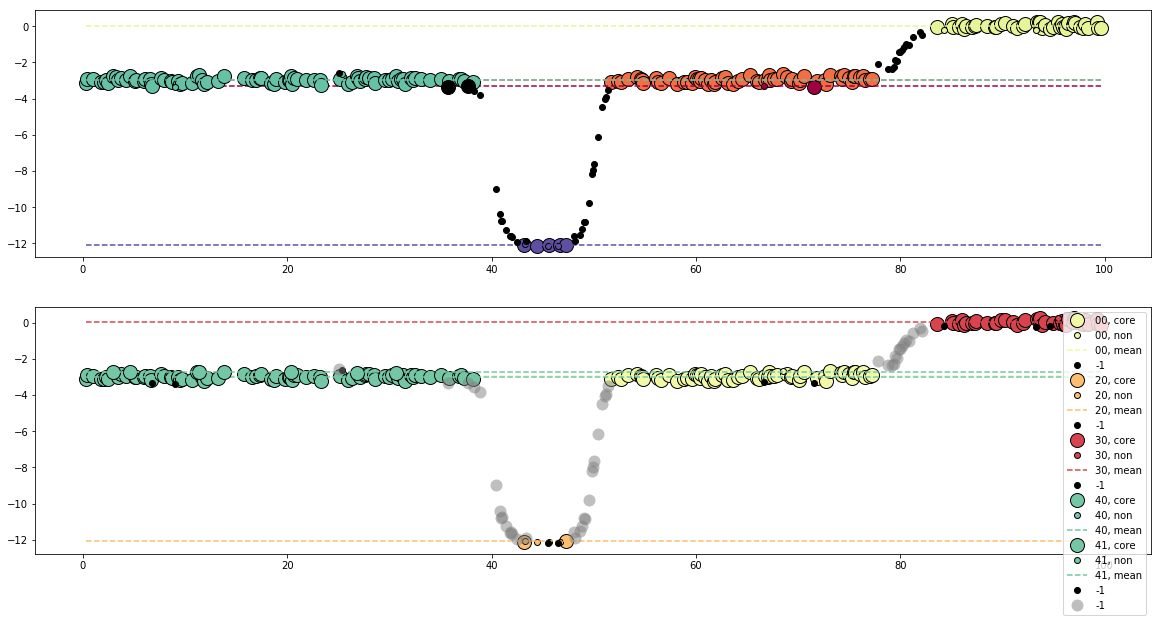

In [144]:
eps=0.04
min_samples = 5

coarse_unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]
random.shuffle(colors)

fig, ax = plt.subplots(2,1, figsize=[20,10])

ax = ax.reshape(2)

ax[0] = plot_regular(labels, core_samples_mask, xxxx_, yyyy_, ax[0])

color_n = 0 
# iterate through the new labeled clusters
# redo dbscan for each cluster
# remove the outliers 
for coarse_label in coarse_unique_labels:

    if coarse_label == -1:
        
        coarse_cluster_mask = (labels == coarse_label)

        x = xxxx_[coarse_cluster_mask]
        y = yyyy_[coarse_cluster_mask]  

        ax[1].plot(x,y, 'o', markersize=12, 
                markerfacecolor='grey', markeredgecolor='grey', markeredgewidth=0,
                alpha=0.5, label='{}'.format(-1))
     
    else:
        # Mask the new events according the the updated labels
        coarse_cluster_mask = (labels == coarse_label)
        xx_coarse = xxxx_[coarse_cluster_mask]
        yy_coarse = yyyy_[coarse_cluster_mask]   
        coarse_std = np.std(yy_coarse)
        
        #print(xx_coarse.size, yy_coarse.size)
        
        # don't need to do this? or check this?
        #newnew_X = StandardScaler().fit_transform(yy_coarse)
        newnew_X = yy_coarse
        #print(newnew_X.size)    

        # Rerun DBScan with a smaller eps-param?
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(yy_coarse)
        fine_core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        fine_core_samples_mask[db.core_sample_indices_] = True
        fine_cluster_labels = db.labels_

        fine_n_clusters_ = len(set(fine_cluster_labels)) - (1 if -1 in fine_cluster_labels else 0)
        fine_n_noise_ = list(fine_cluster_labels).count(-1)

        metric_str = '\nFor coarse cluster=%d, coarse std = %f,\n\teps: %f, nr. clusters: %d, nr noise points: %d' \
            % (coarse_label, coarse_std, eps, fine_n_clusters_, fine_n_noise_)

        sil_sco = -1
        if np.unique(fine_cluster_labels).size>1:
            sil_sco = metrics.silhouette_score(yy_coarse, fine_cluster_labels)
            add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
        else:
            add_str=''

        print(metric_str + add_str)

        fine_unique_labels = set(fine_cluster_labels)

        # Loop over the new refined clusters to exclude the noise
        # Black removed and is used for noise instead.
        col = colors[color_n]

        for fine_label in fine_unique_labels:

            if fine_label==-1:
                
                col = [0, 0, 0, 1]                
                fine_cluster_mask = (fine_cluster_labels == -1)
                x = xx_coarse[fine_cluster_mask]
                y = yy_coarse[fine_cluster_mask]  

                ax[1].plot(x,y, 'o', markerfacecolor=tuple(col),
                             markeredgecolor='k', markersize=6, label=f'{fine_label}')
                    
                fine_std = np.std(y)
                
            else:

                fine_cluster_mask = (fine_cluster_labels == fine_label)

                x = xx_coarse[fine_cluster_mask & fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & fine_core_samples_mask]    

                ax[1].plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14, label='{}{}, core'.format(coarse_label, fine_label))

                x = xx_coarse[fine_cluster_mask & ~fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & ~fine_core_samples_mask]  

                ax[1].plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6, label='{}{}, non'.format(coarse_label, fine_label))

                y_mean = yy_coarse[fine_cluster_mask].mean()
                ax[1].plot([xxxx_[0],xxxx_[-1]],[y_mean, y_mean], '--', color=tuple(col), label='{}{}, mean'.format(coarse_label, fine_label))    

                fine_std = np.std(yy_coarse[fine_cluster_mask])
        
            print(f"\tfine cluster={fine_label}, fine std = {fine_std}")
        
        color_n += 1
    plt.legend()